In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dacon-uos-data/sample_submission.csv
/kaggle/input/dacon-uos-data/train.csv


In [7]:
train=pd.read_csv("/kaggle/input/dacon-uos-data/train.csv")
train

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [4]:
from prophet import Prophet

In [8]:
train["일시"]=pd.to_datetime(train["일시"].astype("str"))
train

,일시,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288
3,2018-01-04,0.792,0.542,0.914,0.292
4,2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,2021-12-27,3.830,3.416,2.908,2.350
1457,2021-12-28,4.510,3.890,3.714,2.700
1458,2021-12-29,4.490,3.524,3.660,2.524
1459,2021-12-30,4.444,3.574,3.530,2.506


In [9]:
train_g=train[["일시","광진구"]]
train_d=train[["일시","동대문구"]]
train_s=train[["일시","성동구"]]
train_j=train[["일시","중랑구"]]

train_g.columns=["ds","y"]
train_d.columns=["ds","y"]
train_s.columns=["ds","y"]
train_j.columns=["ds","y"]


In [10]:
#seasonality_mode 는 multi- (데이터값에 따라 트렌드가 커지는것도 달라질때)/ additive (계절성과 상관없이 데이터가 일정한 크기로 커질때)
#changepoint 는 민감도를 설정할때 쓰는것 trend 변화에 따라 달라지는것
#20이상이면 큰것 아니면 작은것 다른 것들

model_g=Prophet(seasonality_mode = 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20)


model_d=Prophet(seasonality_mode = 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20)

model_s=Prophet(seasonality_mode = 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20)

model_j=Prophet(seasonality_mode = 'multiplicative',
                changepoint_prior_scale=0.1,
                yearly_seasonality=20,
                weekly_seasonality=20,
                daily_seasonality=20)



In [11]:
model_g.fit(train_g)

12:20:58 - cmdstanpy - INFO - Chain [1] start processing
12:21:01 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
model_d.fit(train_d)

12:21:28 - cmdstanpy - INFO - Chain [1] start processing
12:21:29 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
model_s.fit(train_s)

12:21:31 - cmdstanpy - INFO - Chain [1] start processing
12:21:33 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
model_j.fit(train_j)

12:21:42 - cmdstanpy - INFO - Chain [1] start processing
12:21:43 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
#2022년 미래 날짜 데이터 칼럼 추가 
future_g=model_g.make_future_dataframe(periods=334)
future_g

#맨오른쪽에 yhat 이 모델 예측값
result_g=model_g.predict(future_g)
result_g

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,0.180829,-1.984086,2.933904,0.180829,0.180829,4.76186,4.76186,4.76186,1.298075,...,0.367915,0.367915,0.367915,-3.831701,-3.831701,-3.831701,0.0,0.0,0.0,0.415559
1,2018-01-02,0.183211,-1.892515,2.810161,0.183211,0.183211,4.76186,4.76186,4.76186,1.221148,...,0.401105,0.401105,0.401105,-3.941817,-3.941817,-3.941817,0.0,0.0,0.0,0.406939
2,2018-01-03,0.185593,-2.004978,2.922748,0.185593,0.185593,4.76186,4.76186,4.76186,1.339344,...,0.625680,0.625680,0.625680,-4.048196,-4.048196,-4.048196,0.0,0.0,0.0,0.434167
3,2018-01-04,0.187975,-1.971154,2.830754,0.187975,0.187975,4.76186,4.76186,4.76186,1.215783,...,0.598109,0.598109,0.598109,-4.144186,-4.144186,-4.144186,0.0,0.0,0.0,0.416513
4,2018-01-05,0.190357,-1.928538,2.660716,0.190357,0.190357,4.76186,4.76186,4.76186,1.275228,...,0.736881,0.736881,0.736881,-4.223513,-4.223513,-4.223513,0.0,0.0,0.0,0.433106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2022-11-26,1.742137,4.732797,11.014021,1.270003,2.132051,4.76186,4.76186,4.76186,3.634623,...,0.462299,0.462299,0.462299,-1.589536,-1.589536,-1.589536,0.0,0.0,0.0,8.074146
1791,2022-11-27,1.743027,3.932836,10.069698,1.268851,2.135894,4.76186,4.76186,4.76186,3.179640,...,0.141313,0.141313,0.141313,-1.723533,-1.723533,-1.723533,0.0,0.0,0.0,7.285225
1792,2022-11-28,1.743918,4.271491,10.603746,1.267531,2.139737,4.76186,4.76186,4.76186,3.282962,...,0.367915,0.367915,0.367915,-1.846813,-1.846813,-1.846813,0.0,0.0,0.0,7.469134
1793,2022-11-29,1.744808,4.178259,10.228396,1.265444,2.143511,4.76186,4.76186,4.76186,3.208504,...,0.401105,0.401105,0.401105,-1.954461,-1.954461,-1.954461,0.0,0.0,0.0,7.343033


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


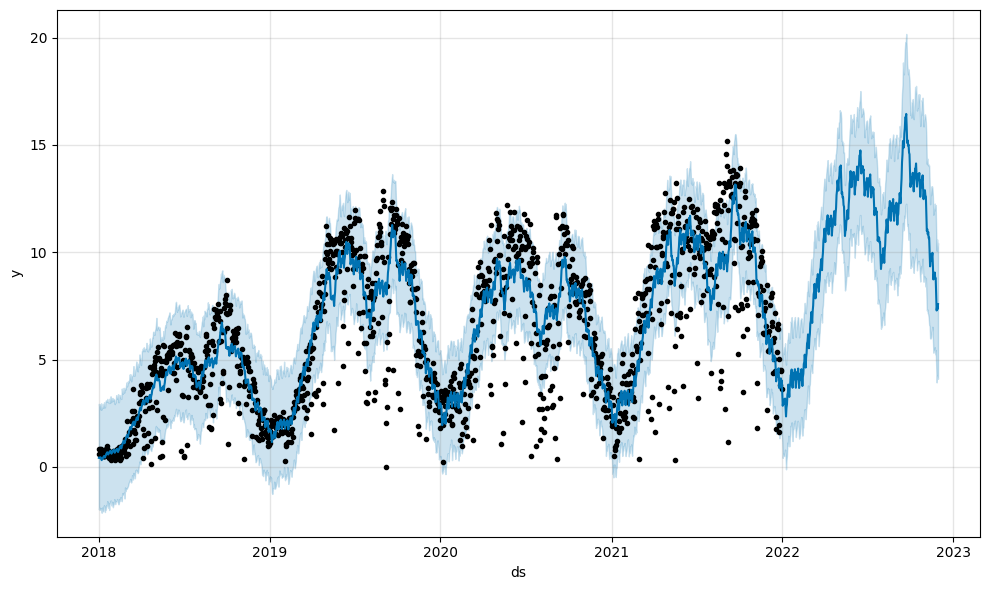

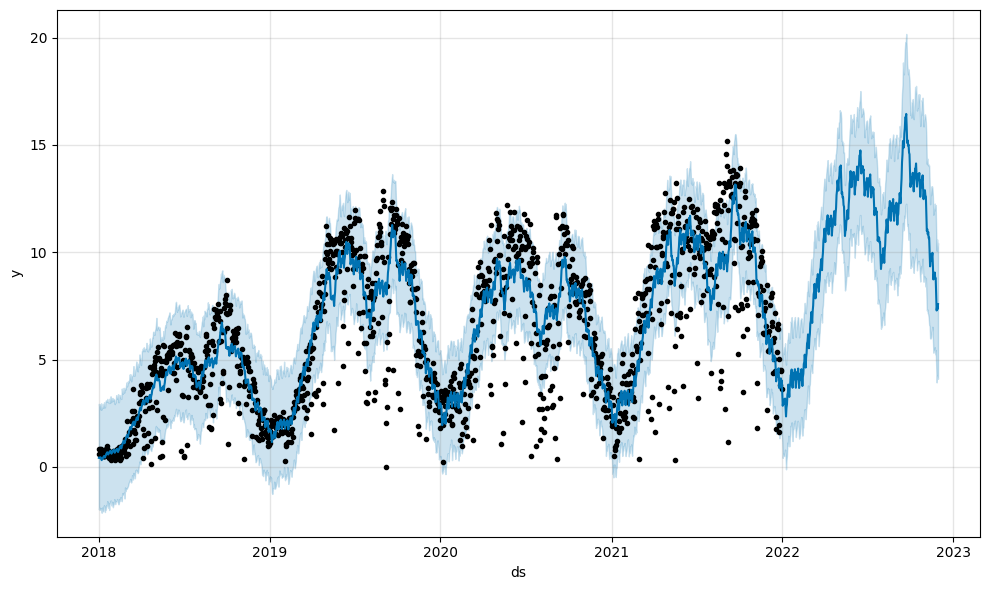

In [19]:
model_g.plot(result_g)
#검은점은 실제정답값 그리고 파란색 라인은 예측값 (하늘색은 상한/하한)

In [20]:
#2022년 미래 날짜 데이터 칼럼 추가 
future_d=model_d.make_future_dataframe(periods=334)
future_d

#맨오른쪽에 yhat 이 모델 예측값
result_d=model_d.predict(future_d)
result_d

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,0.311930,-1.327282,1.947038,0.311930,0.311930,2.06024,2.06024,2.06024,0.323134,...,0.242542,0.242542,0.242542,-1.979647,-1.979647,-1.979647,0.0,0.0,0.0,0.412726
1,2018-01-02,0.313503,-1.311187,1.916251,0.313503,0.313503,2.06024,2.06024,2.06024,0.285695,...,0.278805,0.278805,0.278805,-2.053350,-2.053350,-2.053350,0.0,0.0,0.0,0.403070
2,2018-01-03,0.315077,-1.054546,2.098136,0.315077,0.315077,2.06024,2.06024,2.06024,0.358152,...,0.423775,0.423775,0.423775,-2.125863,-2.125863,-2.125863,0.0,0.0,0.0,0.427922
3,2018-01-04,0.316650,-1.236608,2.111044,0.316650,0.316650,2.06024,2.06024,2.06024,0.303460,...,0.435865,0.435865,0.435865,-2.192644,-2.192644,-2.192644,0.0,0.0,0.0,0.412740
4,2018-01-05,0.318223,-1.259702,1.935929,0.318223,0.318223,2.06024,2.06024,2.06024,0.267386,...,0.456479,0.456479,0.456479,-2.249333,-2.249333,-2.249333,0.0,0.0,0.0,0.403311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2022-11-26,2.620727,4.273688,7.455167,2.450911,2.798802,2.06024,2.06024,2.06024,1.241940,...,-0.092177,-0.092177,-0.092177,-0.726124,-0.726124,-0.726124,0.0,0.0,0.0,5.875513
1791,2022-11-27,2.621920,3.456740,6.791224,2.451569,2.800838,2.06024,2.06024,2.06024,0.956989,...,-0.303121,-0.303121,-0.303121,-0.800129,-0.800129,-0.800129,0.0,0.0,0.0,5.131070
1792,2022-11-28,2.623113,4.774496,8.001649,2.451669,2.802707,2.06024,2.06024,2.06024,1.438441,...,0.242542,0.242542,0.242542,-0.864341,-0.864341,-0.864341,0.0,0.0,0.0,6.396306
1793,2022-11-29,2.624306,4.770421,7.934969,2.451768,2.804809,2.06024,2.06024,2.06024,1.422660,...,0.278805,0.278805,0.278805,-0.916385,-0.916385,-0.916385,0.0,0.0,0.0,6.357802


/opt/conda/lib/python3.10/site-packages/prophet/plot.py:71: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


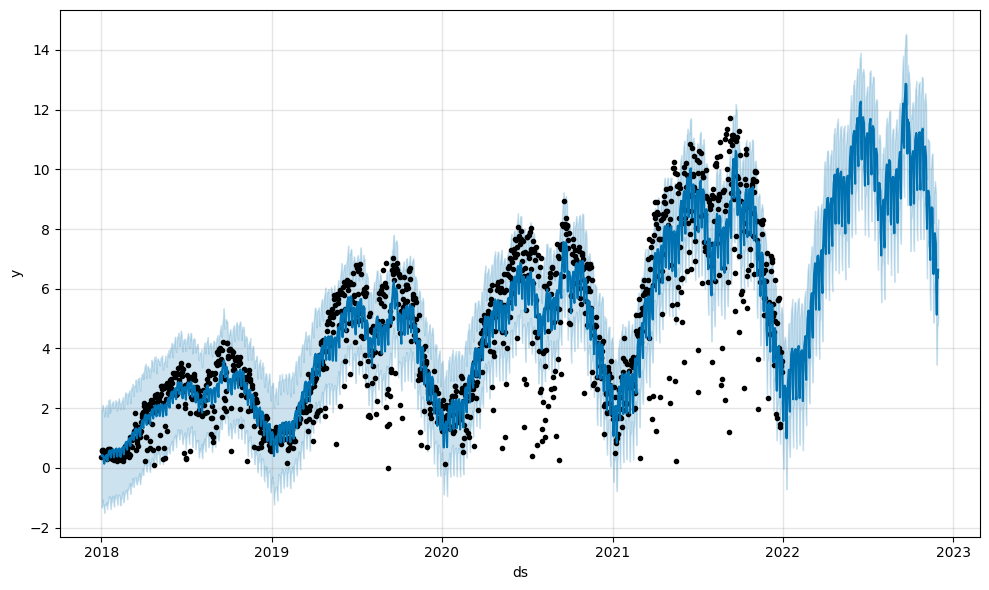

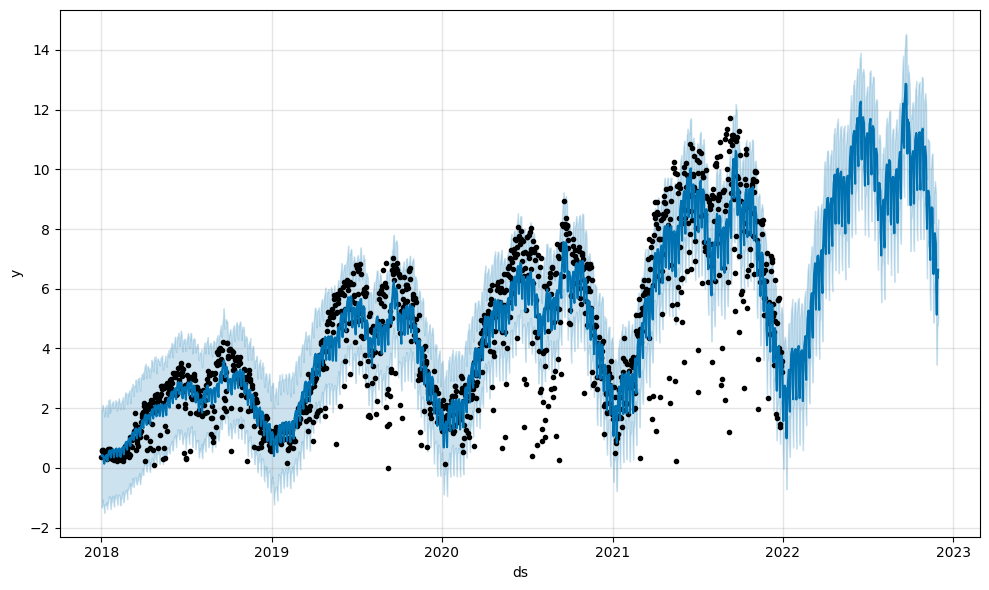

In [23]:
model_d.plot(result_d)
#검은점은 실제정답값 그리고 파란색 라인은 예측값 (하늘색은 상한/하한)

In [21]:
#2022년 미래 날짜 데이터 칼럼 추가 
future_s=model_s.make_future_dataframe(periods=334)
future_s

#맨오른쪽에 yhat 이 모델 예측값
result_s=model_s.predict(future_s)
result_s

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,0.204778,-1.571475,2.541683,0.204778,0.204778,4.6075,4.6075,4.6075,1.229401,...,0.416638,0.416638,0.416638,-3.794737,-3.794737,-3.794737,0.0,0.0,0.0,0.456532
1,2018-01-02,0.206708,-1.509239,2.436006,0.206708,0.206708,4.6075,4.6075,4.6075,1.134599,...,0.432754,0.432754,0.432754,-3.905656,-3.905656,-3.905656,0.0,0.0,0.0,0.441240
2,2018-01-03,0.208639,-1.545266,2.554997,0.208639,0.208639,4.6075,4.6075,4.6075,1.236387,...,0.636728,0.636728,0.636728,-4.007841,-4.007841,-4.007841,0.0,0.0,0.0,0.466598
3,2018-01-04,0.210570,-1.453919,2.463180,0.210570,0.210570,4.6075,4.6075,4.6075,1.146725,...,0.634441,0.634441,0.634441,-4.095216,-4.095216,-4.095216,0.0,0.0,0.0,0.452035
4,2018-01-05,0.212500,-1.594649,2.532689,0.212500,0.212500,4.6075,4.6075,4.6075,1.191122,...,0.746165,0.746165,0.746165,-4.162543,-4.162543,-4.162543,0.0,0.0,0.0,0.465614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2022-11-26,1.406469,3.373278,8.305863,1.124225,1.667873,4.6075,4.6075,4.6075,3.086190,...,0.255164,0.255164,0.255164,-1.776474,-1.776474,-1.776474,0.0,0.0,0.0,5.747102
1791,2022-11-27,1.407019,2.892482,7.667680,1.123567,1.669521,4.6075,4.6075,4.6075,2.807194,...,0.103360,0.103360,0.103360,-1.903666,-1.903666,-1.903666,0.0,0.0,0.0,5.356793
1792,2022-11-28,1.407568,3.334770,8.044249,1.123459,1.670948,4.6075,4.6075,4.6075,3.010113,...,0.416638,0.416638,0.416638,-2.014025,-2.014025,-2.014025,0.0,0.0,0.0,5.644508
1793,2022-11-29,1.408118,3.114414,8.103811,1.123440,1.672764,4.6075,4.6075,4.6075,2.936547,...,0.432754,0.432754,0.432754,-2.103708,-2.103708,-2.103708,0.0,0.0,0.0,5.543121


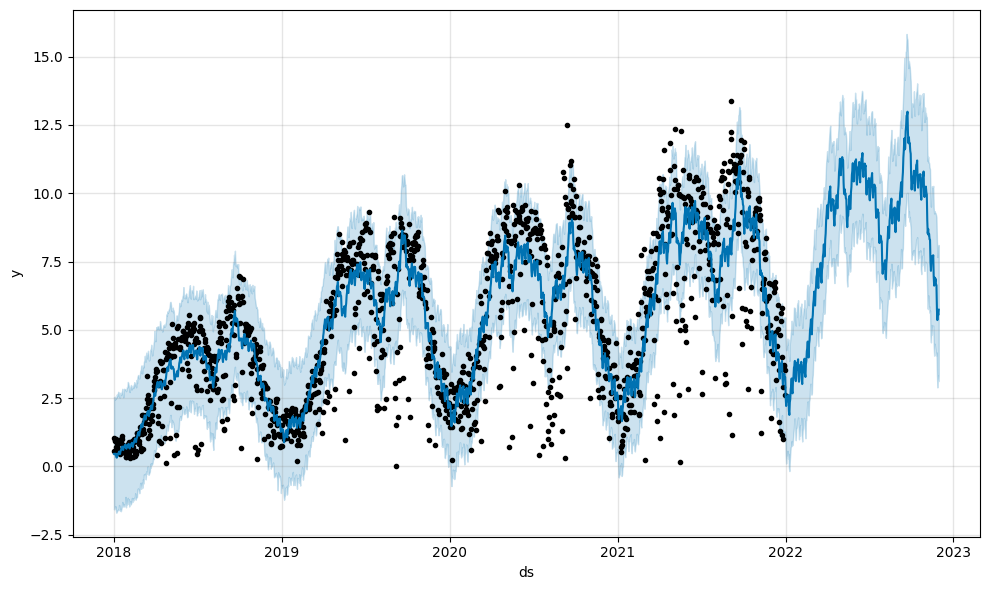

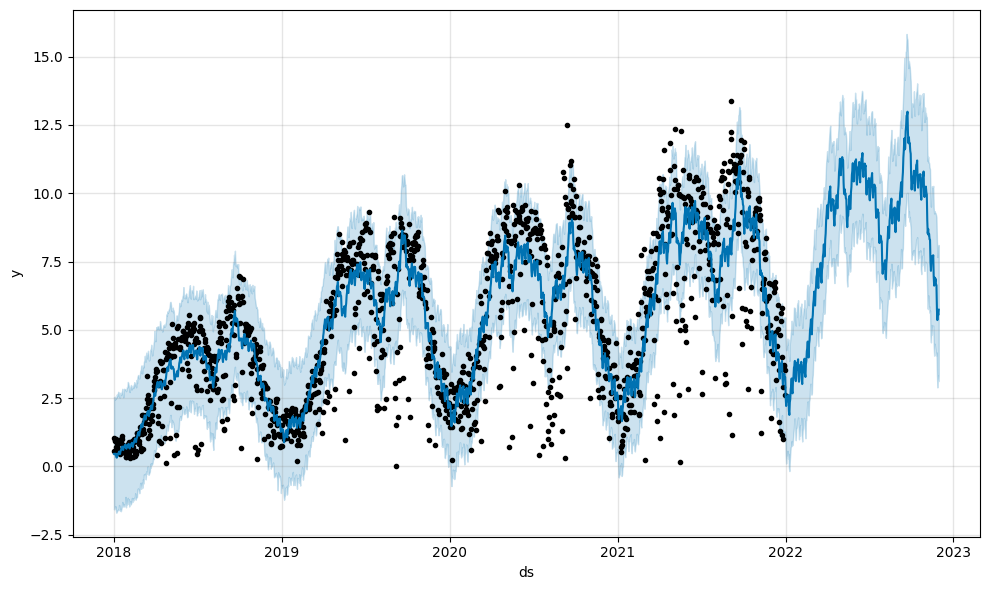

In [25]:
model_s.plot(result_s)
#검은점은 실제정답값 그리고 파란색 라인은 예측값 (하늘색은 상한/하한)

In [22]:
#2022년 미래 날짜 데이터 칼럼 추가 
future_j=model_j.make_future_dataframe(periods=334)
future_j

#맨오른쪽에 yhat 이 모델 예측값
result_j=model_j.predict(future_j)
result_j

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2018-01-01,0.641021,-0.965990,1.444371,0.641021,0.641021,0.121418,0.121418,0.121418,-0.601832,...,-0.016699,-0.016699,-0.016699,-0.706551,-0.706551,-0.706551,0.0,0.0,0.0,0.255234
1,2018-01-02,0.644199,-1.022540,1.468788,0.644199,0.644199,0.121418,0.121418,0.121418,-0.606199,...,0.005297,0.005297,0.005297,-0.732915,-0.732915,-0.732915,0.0,0.0,0.0,0.253686
2,2018-01-03,0.647377,-0.866842,1.542057,0.647377,0.647377,0.121418,0.121418,0.121418,-0.582344,...,0.055457,0.055457,0.055457,-0.759218,-0.759218,-0.759218,0.0,0.0,0.0,0.270381
3,2018-01-04,0.650555,-0.946048,1.487096,0.650555,0.650555,0.121418,0.121418,0.121418,-0.605125,...,0.057473,0.057473,0.057473,-0.784016,-0.784016,-0.784016,0.0,0.0,0.0,0.256888
4,2018-01-05,0.653733,-0.959263,1.469553,0.653733,0.653733,0.121418,0.121418,0.121418,-0.604709,...,0.079778,0.079778,0.079778,-0.805905,-0.805905,-0.805905,0.0,0.0,0.0,0.258415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,2022-11-26,5.313125,3.198465,5.606048,5.287743,5.337689,0.121418,0.121418,0.121418,-0.177057,...,-0.004754,-0.004754,-0.004754,-0.293722,-0.293722,-0.293722,0.0,0.0,0.0,4.372399
1791,2022-11-27,5.315440,2.638263,4.935378,5.289965,5.340129,0.121418,0.121418,0.121418,-0.288153,...,-0.091559,-0.091559,-0.091559,-0.318012,-0.318012,-0.318012,0.0,0.0,0.0,3.783779
1792,2022-11-28,5.317755,2.780078,5.278719,5.292186,5.342558,0.121418,0.121418,0.121418,-0.233785,...,-0.016699,-0.016699,-0.016699,-0.338504,-0.338504,-0.338504,0.0,0.0,0.0,4.074543
1793,2022-11-29,5.320070,2.897267,5.340356,5.294408,5.344986,0.121418,0.121418,0.121418,-0.228020,...,0.005297,0.005297,0.005297,-0.354735,-0.354735,-0.354735,0.0,0.0,0.0,4.106987


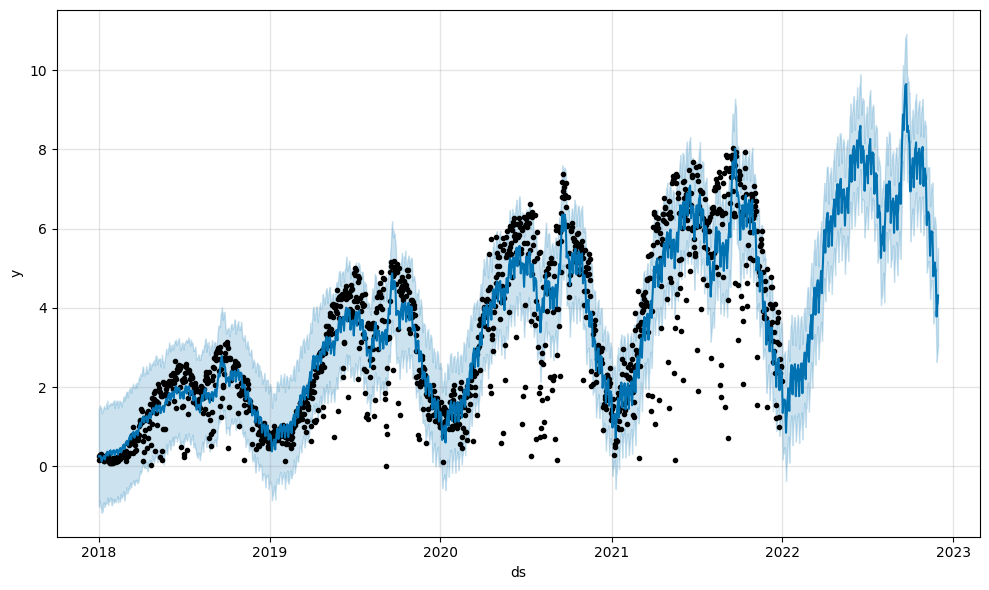

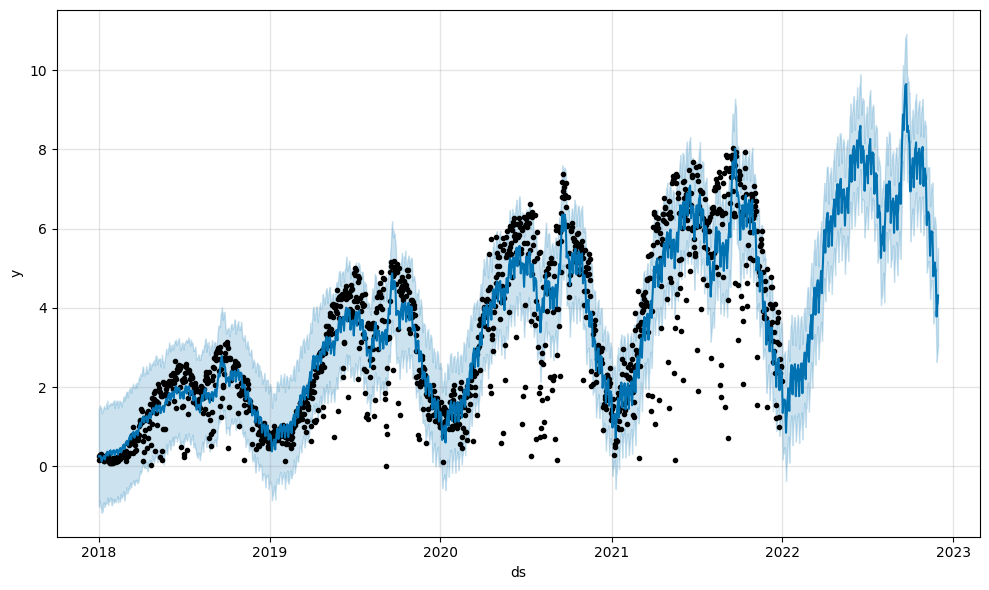

In [26]:
model_j.plot(result_j)
#검은점은 실제정답값 그리고 파란색 라인은 예측값 (하늘색은 상한/하한)

/opt/conda/lib/python3.10/site-packages/prophet/plot.py:226: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:349: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/conda/lib/python3.10/site-packages/prophet/plot.py:352: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

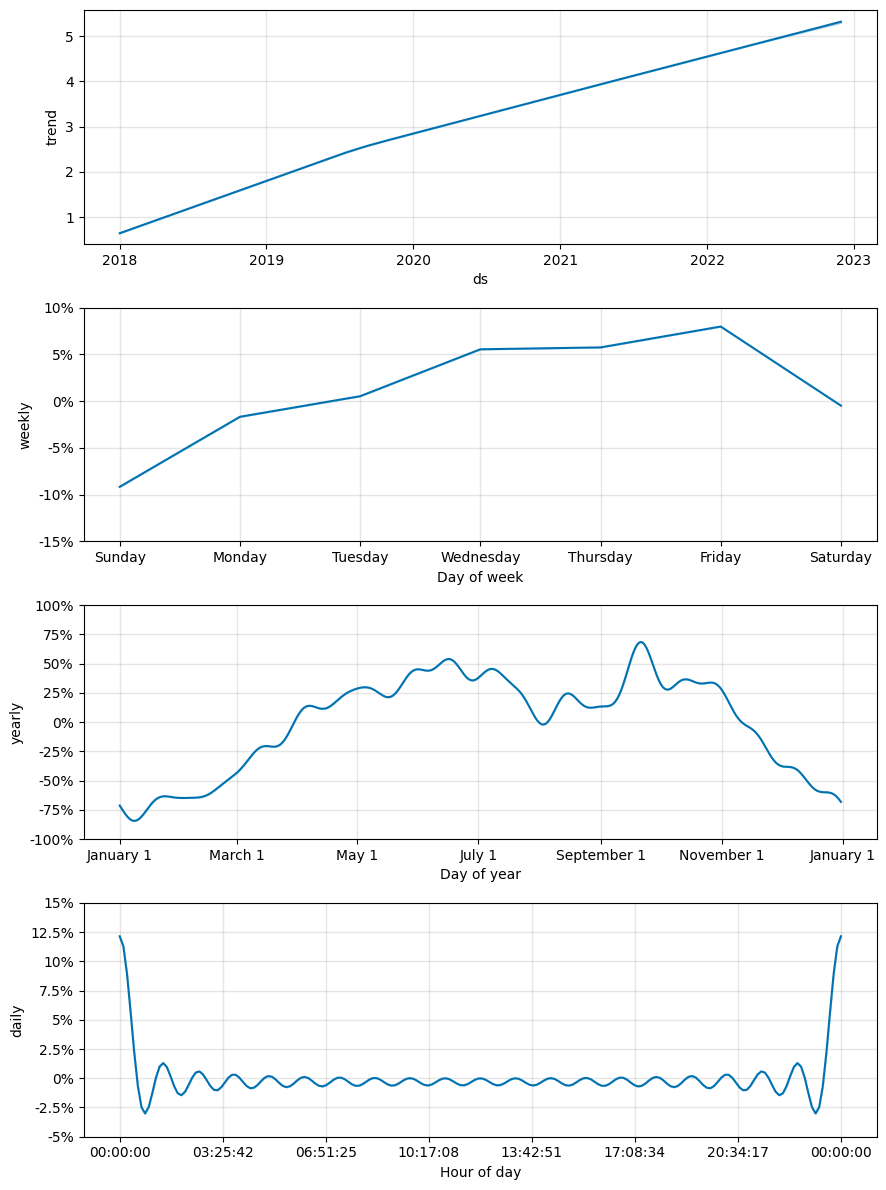

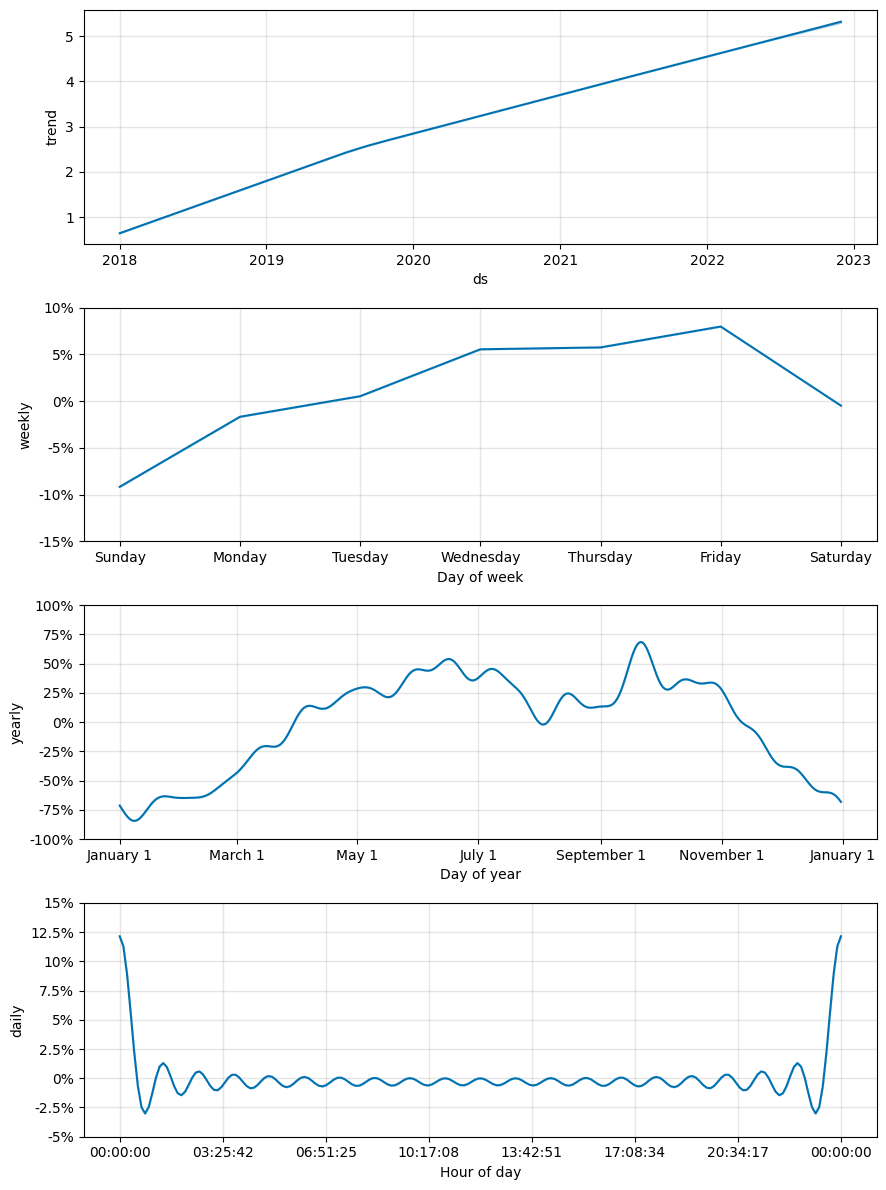

In [27]:
model_j.plot_components(result_j)

In [3]:
sub=pd.read_csv("/kaggle/input/dacon-uos-data/sample_submission.csv")
sub

,일시,광진구,동대문구,성동구,중랑구
0,20220101,0,0,0,0
1,20220102,0,0,0,0
2,20220103,0,0,0,0
3,20220104,0,0,0,0
4,20220105,0,0,0,0
...,...,...,...,...,...
329,20221126,0,0,0,0
330,20221127,0,0,0,0
331,20221128,0,0,0,0
332,20221129,0,0,0,0


In [29]:
sub["광진구"]=np.array(result_g.iloc[-334:,-1])
sub["동대문구"]=np.array(result_d.iloc[-334:,-1])
sub["성동구"]=np.array(result_s.iloc[-334:,-1])
sub["중랑구"]=np.array(result_j.iloc[-334:,-1])



In [30]:
sub

,일시,광진구,동대문구,성동구,중랑구
0,20220101,3.466956,2.202468,2.534705,1.866631
1,20220102,2.843983,1.569034,2.213671,1.352226
2,20220103,3.020162,2.625314,2.473636,1.574144
3,20220104,2.930844,2.558605,2.387283,1.562172
4,20220105,3.143641,2.757108,2.556143,1.691903
...,...,...,...,...,...
329,20221126,8.074146,5.875513,5.747102,4.372399
330,20221127,7.285225,5.131070,5.356793,3.783779
331,20221128,7.469134,6.396306,5.644508,4.074543
332,20221129,7.343033,6.357802,5.543121,4.106987


In [31]:
sub.to_csv("sub_prophet.csv",index=0)